In [119]:
import pandas as pd
import numpy as np
data = pd.read_csv("sample.csv")
data.head(10)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1
5,T00047124,28-08-2023,10:09:28 AM,da557bc8-c1af-464b-924f-1208adbf71e8,213a302c-3fea-4e55-ab11-de8623e2bafa,a897cf08-32e4-4182-ae3a-cfe6d3d109b2,Purchase,SamplePay,Bhiwani,Assam,131.232.177.62,Completed,iOS,20,More Services,Mobile,-21.99,7,186.83,1
6,T00041539,07-05-2023,8:41:28 AM,3e4f66ce-d0ad-457e-b07b-c973fd0a36bc,7d4a89c7-b7cb-49b7-b5b0-88c44f7a934c,b757c7dd-fe5a-4e03-a619-2966ed386347,Other,SamplePay,Bidhannagar,Andhra Pradesh,155.98.123.213,Failed,Windows,0,Financial services and Taxes,Online,59.58,14,78.51,1
7,T00044626,15-02-2024,7:56:28 AM,299a8dce-10fa-4d2f-9519-ea5d4f41e910,1b450161-de24-4eb9-9e8f-d13b1b8dddbe,627021b7-5bf2-4884-b97a-f96ab9130d19,Other,Alpha Bank,Asansol,Assam,161.223.110.22,Completed,Android,3,More Services,Online,36.24,11,472.17,1
8,T00007389,12-10-2023,10:16:46 AM,ab766f4b-5f3b-4138-8ef3-d7a3a1a07bf4,aa31d906-e32c-439c-88d4-5992f992203d,21f735e5-5477-4d00-bc71-9928c0ee5471,Subscription,Sigma Bank,Kakinada,West Bengal,180.0.245.239,Completed,Windows,2,Investment,In-store,-14.65,5,84.65,1
9,T00032829,02-03-2024,1:45:19 AM,5b0d22d2-b0eb-41be-ba47-580b10ede9cd,11258bff-f01b-4dbd-b41a-7fda1d6f48d3,1676c4a0-1439-4d1e-a1cb-2f320fdf5414,Bank Transfer,UPI Pay,Anantapur,Goa,129.147.134.252,Failed,iOS,1,Investment,Online,12.83,18,238.36,1


Data Cleaning

In [121]:
data.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [123]:
data.duplicated().sum()

0

In [125]:
data["Transaction_Type"] = data["Transaction_Type"].map({"Refund": 1, "Bank Transfer": 2, 
                                 "Investment": 3, "Purchase": 4,
                                 "Other": 5, "Subscription": 6})
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,1.0,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,2.0,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,2.0,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,6.0,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,3.0,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


EDA

In [127]:
import seaborn as sns

In [129]:
import matplotlib.pyplot as plt

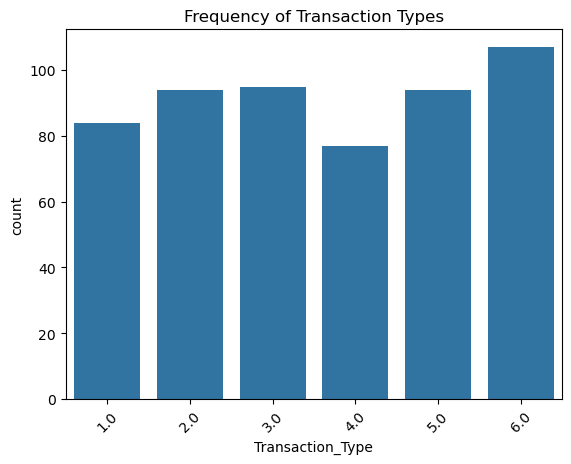

In [131]:
sns.countplot(x='Transaction_Type', data=data)
plt.xticks(rotation=45)
plt.title("Frequency of Transaction Types")
plt.show()

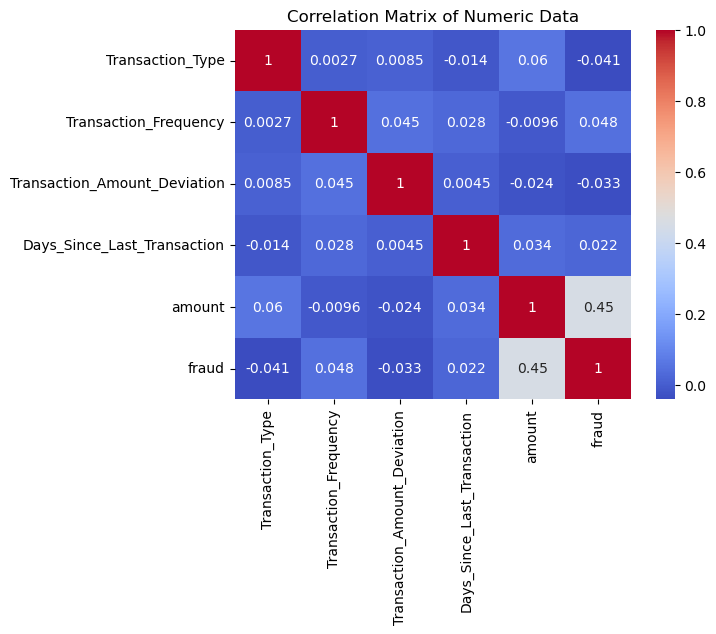

In [133]:
numeric_data = data.select_dtypes(include='number')

correlation_matrix = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Data")
plt.show()



<Axes: xlabel='amount', ylabel='Count'>

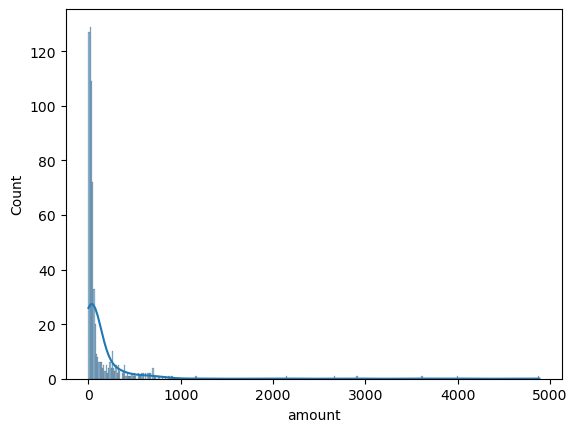

In [135]:
import seaborn as sns
sns.histplot(data['amount'], kde=True)


In [137]:
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,1.0,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,2.0,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,2.0,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,6.0,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,3.0,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [139]:

numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data[non_numeric_columns] = data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])


In [100]:
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,1.0,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,2.0,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,2.0,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,6.0,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,3.0,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [141]:
data['high_value_transaction'] = data['amount'] > data['amount'].median()
data['transaction_risk_score'] = data['Transaction_Frequency'] * data['amount']
data['time_since_last'] = data['Days_Since_Last_Transaction'] * data['Transaction_Frequency']


In [143]:
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,high_value_transaction,transaction_risk_score,time_since_last
0,T00022452,20-04-2023,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,1.0,SamplePay,Durgapur,Chhattisgarh,...,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,True,396.62,5
1,T00032233,08-08-2023,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,2.0,SamplePay,Rajpur Sonarpur,Himachal Pradesh,...,30,Home delivery,Mobile,-36.64,20,121.94,1,True,3658.20,600
2,T00037364,25-06-2023,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,2.0,Other,New Delhi,Himachal Pradesh,...,2,Utilities,Online,44.19,22,106.69,1,True,213.38,44
3,T00015924,28-01-2024,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,6.0,UPI Pay,Bharatpur,Chhattisgarh,...,0,Purchases,Online,-54.34,28,3611.11,1,True,0.00,0
4,T00021805,21-06-2023,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,3.0,Dummy Bank,Sagar,Mizoram,...,1,Other,Online,12.38,25,374.89,1,True,374.89,25


In [147]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for later use (e.g., decoding)

In [32]:
data.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,305,186,373,618,354,497,1.0,6,78,4,123,0,1,1,0,0,25.02,5,396.62,1
1,435,76,552,530,355,256,2.0,6,218,8,280,2,2,30,3,1,-36.64,20,121.94,1
2,500,239,529,282,506,172,2.0,5,189,8,198,1,0,2,9,2,44.19,22,106.69,1
3,211,266,426,543,405,17,6.0,8,37,4,544,1,0,0,7,2,-54.34,28,3611.11,1
4,297,200,622,96,494,19,3.0,3,225,16,446,0,1,1,6,2,12.38,25,374.89,1


In [149]:
data['amount_deviation_ratio'] = data['Transaction_Amount_Deviation'] / data['amount']
data['failed_transaction'] = data['Transaction_Status'].apply(lambda x: 1 if x == 0 else 0)
data['customer_merchant_interaction'] = data['Customer_ID'] * data['Merchant_ID']


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [153]:
data.head()


,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,high_value_transaction,transaction_risk_score,time_since_last,amount_deviation_ratio,failed_transaction,customer_merchant_interaction
0,305,186,373,618,354,497,1.0,6,78,4,...,25.02,5,396.62,1,True,396.62,5,0.063083,1,218772
1,435,76,552,530,355,256,2.0,6,218,8,...,-36.64,20,121.94,1,True,3658.20,600,-0.300476,0,188150
2,500,239,529,282,506,172,2.0,5,189,8,...,44.19,22,106.69,1,True,213.38,44,0.414191,0,142692
3,211,266,426,543,405,17,6.0,8,37,4,...,-54.34,28,3611.11,1,True,0.00,0,-0.015048,0,219915
4,297,200,622,96,494,19,3.0,3,225,16,...,12.38,25,374.89,1,True,374.89,25,0.033023,1,47424


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction_ID                 647 non-null    int32  
 1   Date                           647 non-null    int32  
 2   Time                           647 non-null    int32  
 3   Merchant_ID                    647 non-null    int32  
 4   Customer_ID                    647 non-null    int32  
 5   Device_ID                      647 non-null    int32  
 6   Transaction_Type               647 non-null    float64
 7   Payment_Gateway                647 non-null    int32  
 8   Transaction_City               647 non-null    int32  
 9   Transaction_State              647 non-null    int32  
 10  IP_Address                     647 non-null    int32  
 11  Transaction_Status             647 non-null    int32  
 12  Device_OS                      647 non-null    int

In [157]:
X = data.drop('fraud', axis=1)   
y = data['fraud']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [163]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
xgb=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
isf = IsolationForest(contamination=0.1, random_state=42)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [165]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'xgb':xgb,
    'LR': lrc,
    'RF': rfc,
    'isf': isf,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gdbt,
}


In [167]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred,average='binary')

    return accuracy,precision

In [169]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    precision = precision_score(y_test, y_pred, average='macro')  # Or 'weighted', 'micro'
    
    return accuracy, precision


accuracy_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For {name}:")
    print(f"Accuracy: {current_accuracy:.4f}")
    print(f"Precision: {current_precision:.4f}")


C:\Users\RUSHIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC:
Accuracy: 0.7154
Precision: 0.3577
For KN:
Accuracy: 0.7154
Precision: 0.6129
For DT:
Accuracy: 0.8692
Precision: 0.8876


C:\Users\RUSHIL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:09:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


For xgb:
Accuracy: 0.8846
Precision: 0.9306
For LR:
Accuracy: 0.8692
Precision: 0.9227
For RF:
Accuracy: 0.9000
Precision: 0.9387


C:\Users\RUSHIL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RUSHIL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For isf:
Accuracy: 0.2538
Precision: 0.0948
For AdaBoost:
Accuracy: 0.8692
Precision: 0.9032
For BgC:
Accuracy: 0.8846
Precision: 0.8990
For ETC:
Accuracy: 0.8615
Precision: 0.8982
For GBDT:
Accuracy: 0.9000
Precision: 0.9387


We are taking randomforest as it is giving more accuracy

In [171]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [173]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.00%


In [175]:
import pickle

In [177]:
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'fraud_detection_model.pkl'.")

Model saved as 'fraud_detection_model.pkl'.
